In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 94% 153M/163M [00:01<00:00, 154MB/s]
100% 163M/163M [00:01<00:00, 157MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**IMPORTING THE DEPENDENCIES**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3021.jpg', 'with_mask_3601.jpg', 'with_mask_3072.jpg', 'with_mask_1032.jpg', 'with_mask_470.jpg']
['with_mask_1135.jpg', 'with_mask_1160.jpg', 'with_mask_3433.jpg', 'with_mask_1286.jpg', 'with_mask_3590.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_162.jpg', 'without_mask_34.jpg', 'without_mask_740.jpg', 'without_mask_1825.jpg', 'without_mask_55.jpg']
['without_mask_483.jpg', 'without_mask_1258.jpg', 'without_mask_1459.jpg', 'without_mask_1381.jpg', 'without_mask_3452.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask --> 1

without mask --> 0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

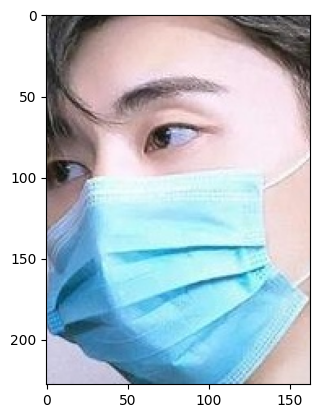

In [ ]:
# displaying with mask image

img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

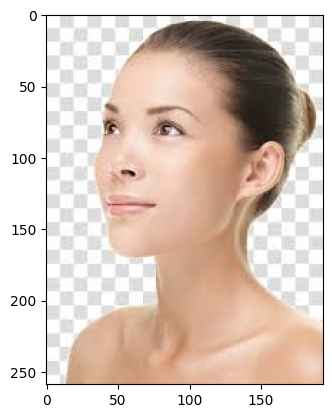

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [107, 102,  96],
        [100,  95,  89],
        [104,  99,  93]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [107, 102,  96],
        [ 97,  92,  86],
        [107, 102,  96]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [103,  98,  92],
        [ 94,  89,  83],
        [112, 107, 101]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[ 62,  50,  40],
        [ 58,  45,  37],
        [ 53,  40,  36],
        ...,
        [ 40,  31,  29],
        [ 40,  31,  28],
        [ 40,  31,  28]],

       [[ 59,  46,  37],
        [ 55,  42,  34],
        [ 52,  39,  33],
        ...,
        [ 40,  31,  29],
        [ 39,  30,  28],
        [ 38,  30,  27]],

       [[ 59,  46,  35],
        [ 55,  42,  33],
        [ 52,  38,  32],
        ...,
        [ 38,  30,  29],
        [ 37,  30,  29],
        [ 37,  30,  29]],

       ...,

       [[244, 252, 255],
        [242, 249, 255],
        [240, 246, 255],
        ...,
        [232, 196, 197],
        [210,  47,  49],
        [251, 198, 193]],

       [[245, 250, 255],
        [242, 247, 255],
        [240, 243, 255],
        ...,
        [223, 224, 223],
        [230, 108, 109],
        [207,  88,  89]],

       [[246, 249, 255],
        [241, 245, 254],
        [238, 241, 252],
        ...,
        [ 49,  55,  59],
        [166, 152, 148],
        [197,  54,  61]]

In [ ]:
X_train_scaled[0]

array([[[0.24313725, 0.19607843, 0.15686275],
        [0.22745098, 0.17647059, 0.14509804],
        [0.20784314, 0.15686275, 0.14117647],
        ...,
        [0.15686275, 0.12156863, 0.11372549],
        [0.15686275, 0.12156863, 0.10980392],
        [0.15686275, 0.12156863, 0.10980392]],

       [[0.23137255, 0.18039216, 0.14509804],
        [0.21568627, 0.16470588, 0.13333333],
        [0.20392157, 0.15294118, 0.12941176],
        ...,
        [0.15686275, 0.12156863, 0.11372549],
        [0.15294118, 0.11764706, 0.10980392],
        [0.14901961, 0.11764706, 0.10588235]],

       [[0.23137255, 0.18039216, 0.1372549 ],
        [0.21568627, 0.16470588, 0.12941176],
        [0.20392157, 0.14901961, 0.1254902 ],
        ...,
        [0.14901961, 0.11764706, 0.11372549],
        [0.14509804, 0.11764706, 0.11372549],
        [0.14509804, 0.11764706, 0.11372549]],

       ...,

       [[0.95686275, 0.98823529, 1.        ],
        [0.94901961, 0.97647059, 1.        ],
        [0.94117647, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=15)

Epoch 1/15
170/170 [==============================] - 15s 25ms/step - loss: 0.4658 - acc: 0.7990 - val_loss: 0.2490 - val_acc: 0.9074
Epoch 2/15
170/170 [==============================] - 3s 18ms/step - loss: 0.2895 - acc: 0.8839 - val_loss: 0.2301 - val_acc: 0.9058
Epoch 3/15
170/170 [==============================] - 3s 17ms/step - loss: 0.2267 - acc: 0.9106 - val_loss: 0.2082 - val_acc: 0.9223
Epoch 4/15
170/170 [==============================] - 3s 17ms/step - loss: 0.1922 - acc: 0.9231 - val_loss: 0.2213 - val_acc: 0.9190
Epoch 5/15
170/170 [==============================] - 3s 19ms/step - loss: 0.1782 - acc: 0.9314 - val_loss: 0.2173 - val_acc: 0.9174
Epoch 6/15
170/170 [==============================] - 3s 19ms/step - loss: 0.1432 - acc: 0.9393 - val_loss: 0.2213 - val_acc: 0.9355
Epoch 7/15
170/170 [==============================] - 3s 17ms/step - loss: 0.1248 - acc: 0.9524 - val_loss: 0.3633 - val_acc: 0.8760
Epoch 8/15
170/170 [==============================] - 3s 18ms/step -

**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2812 - acc: 0.9437
Test Accuracy = 0.9437458515167236


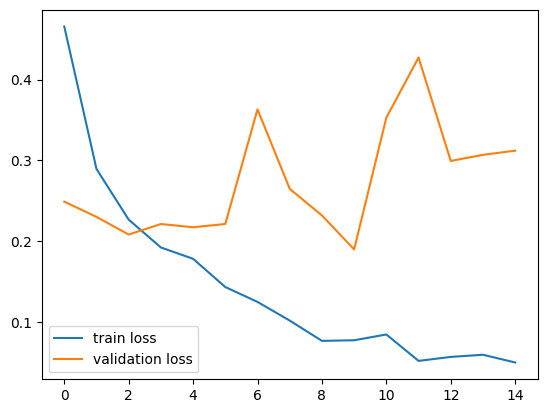

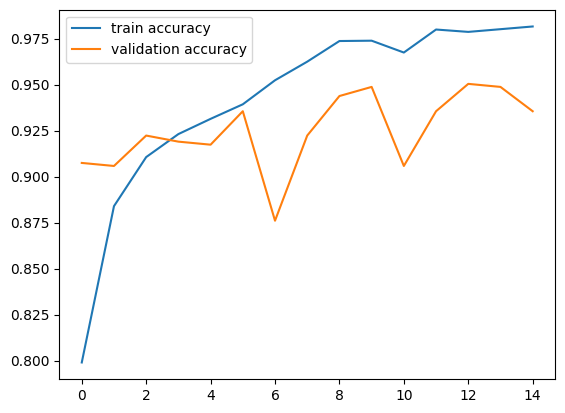

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/WithoutMask_1.jpeg


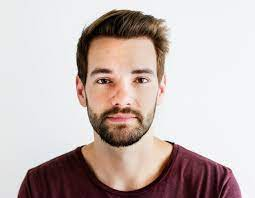

1/1 [==============================] - 0s 19ms/step
[[0.62625325 0.45002553]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')